# Boundary conditions

In FEniCS, the "CompiledSubDomain" class is a useful tool that allows users to define complex subdomains within a given computational domain for finite element simulations. Subdomains are portions of the computational domain where different physical or material properties are applied, or specific boundary conditions are imposed.

The primary advantage of using the "CompiledSubDomain" class is that it allows you to define subdomains using mathematical expressions or conditions, which are then compiled into efficient C++ code. This compiled code is utilized during the simulation, providing a significant performance boost compared to interpreting the subdomain expressions directly in Python.

Please visit the official documentation link provided to learn how to modify the bounday conditions using "CompiledSubDomain". After familiarizing yourself with the process, return here to implement the changes and visualize the updated results.

https://fenicsproject.org/pub/tutorial/sphinx1/._ftut1005.html#using-c-code-snippets-to-define-subdomains

In [9]:
from dolfin import *

**Change this portion of the code to:**
1. Make a 2D unit square mesh.

In [10]:
mesh = UnitSquareMesh(32, 32)

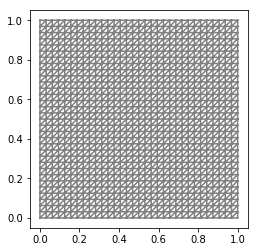

In [11]:
plot(mesh)

In [12]:
U = FunctionSpace(mesh, "CG", 1)

**Change this portion of the code to:**
1. Mark only the left edge as fixed.
2. Mark the left and top edge as fixed.

In [13]:
u_D = Constant(0.0)
boundary = CompiledSubDomain("on_boundary and (near(x[0],0) or near(x[1],1))")
bc = DirichletBC(U, u_D, boundary)

In [19]:
from dolfin import *
import numpy
%matplotlib inline

mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, 'Lagrange', 1)

tol = 1E-14

left_boundary = CompiledSubDomain("on_boundary && near(x[0],0)")
top_boundary = CompiledSubDomain("on_boundary && near(x[1],1)")


bc_0 = DirichletBC(V, Constant(0.0), left_boundary)
bc_1 = DirichletBC(V, Constant(1.0), top_boundary)
bcs = [bc_0, bc_1]

m = 5
def q(u):
    return (1+u)**m

# Define variational problem
v = TestFunction(V)
du = TrialFunction(V)
u = Function(V)  # most recently computed solution
F = inner(q(u)*nabla_grad(u), nabla_grad(v))*dx


J = derivative(F, u, du)
problem = NonlinearVariationalProblem(F, u, bcs, J)
solver = NonlinearVariationalSolver(problem)

prm = solver.parameters
prm['newton_solver']['absolute_tolerance'] = 1E-5
prm['newton_solver']['relative_tolerance'] = 1E-5
prm['newton_solver']['maximum_iterations'] = 25

solver.solve()

(6, True)

In [20]:
u.rename("Solution", 'u')

with XDMFFile("output/result2_2.xdmf") as outfile:
    outfile.write_checkpoint(u, "Solution", 0, XDMFFile.Encoding.HDF5, append=False)